# Keras Regression

___

Here we will also focus on feature engineering and cleaning our data along with regression

### Data

## The Data

We will be using data from a Kaggle data set:

https://www.kaggle.com/harlfoxem/housesalesprediction

#### Feature Columns
    
* **id** - Unique ID for each home sold
* **date** - Date of the home sale
* **price** - Price of each home sold
* **bedrooms** - Number of bedrooms
* **bathrooms** - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* **sqft_living** - Square footage of the apartments interior living space
* **sqft_lot** - Square footage of the land space
* **floors** - Number of floors
* **waterfront** - A dummy variable for whether the apartment was overlooking the waterfront or not
* **view** - An index from 0 to 4 of how good the view of the property was
* **condition - An index from 1 to 5 on the condition of the apartment,
* **grade** - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* **sqft_above** - The square footage of the interior housing space that is above ground level
* **sqft_basement** - The square footage of the interior housing space that is below ground level
* **yr_built** - The year the house was initially built
* **yr_renovated** - The year of the house’s last renovation
* **zipcode** - What zipcode area the house is in
* **lat** - Lattitude
* **long** - Longitude
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

___

### Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [6]:
df = pd.read_csv('../DATA/kc_house_data.csv')

## Exploratory Data Analysis

In [7]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

No Null data is present !

### Data Description

In [8]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21597.0,4.580474e+09,2.876736e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21597.0,5.402966e+05,3.673681e+05,7.800000e+04,3.220000e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21597.0,3.373200e+00,9.262989e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21597.0,2.115826e+00,7.689843e-01,5.000000e-01,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21597.0,2.080322e+03,9.181061e+02,3.700000e+02,1.430000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21597.0,1.509941e+04,4.141264e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068500e+04,1.651359e+06
floors,21597.0,1.494096e+00,5.396828e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21597.0,7.547345e-03,8.654900e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21597.0,2.342918e-01,7.663898e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21597.0,3.409825e+00,6.505456e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


### Distribution of Price Range

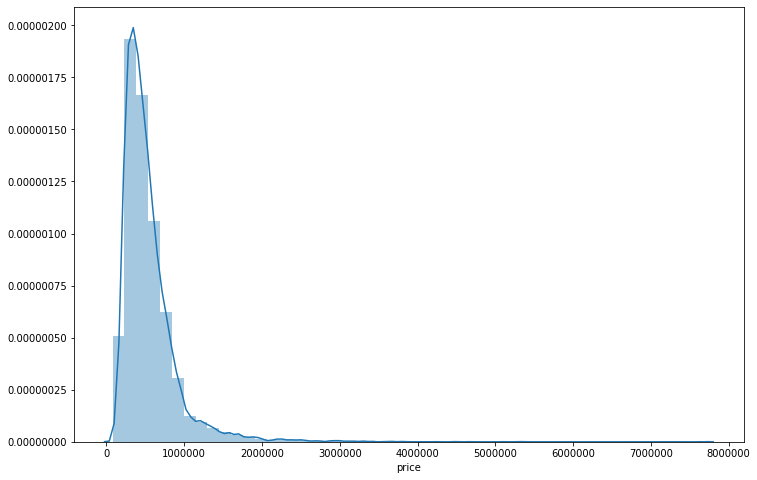

In [10]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

It indicates more number of houses price comes in range 0 to 2000000

### Count of Bandrooms

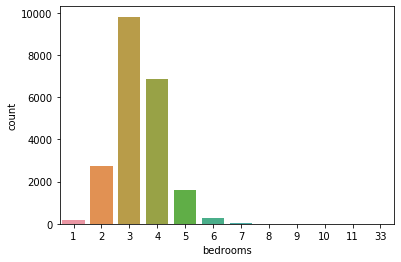

In [11]:
sns.countplot(df['bedrooms'])

It indicates that more houses having 3 bedrooms and there is a mansion with 33 bedroom

### price vs sqft_living

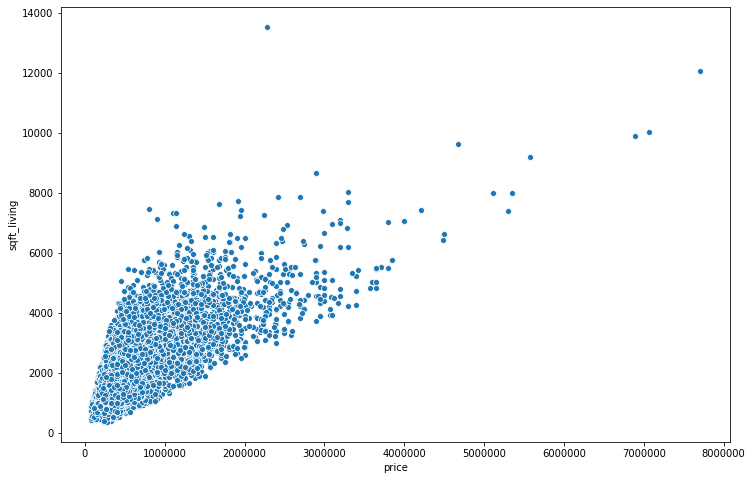

In [12]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['price'], y=df['sqft_living'])

The price of the house is increasing with the increase in the sq.ft living

### price vs bedrooms

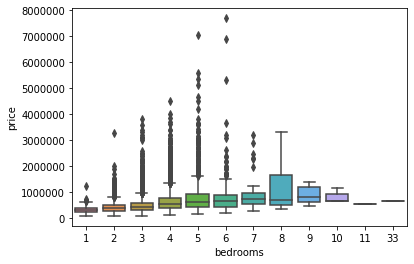

In [14]:
sns.boxplot(x=df['bedrooms'], y=df['price'])

The prices of houses are increasing with the increase in the no of bedroom and the price is more for bedrooms 5,6

### Geographical Properties

#### price vs longitude

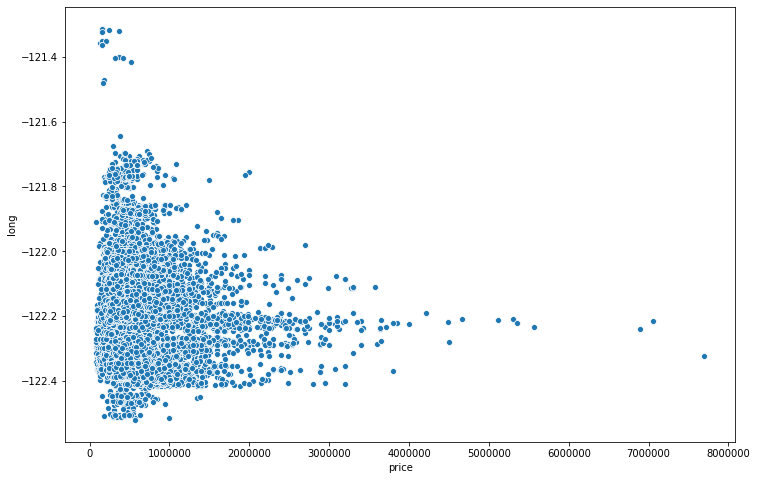

In [15]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['price'], y=df['long'])

It indicates that the price of the houses will be more in the longitude in -122.2 and -122.3

#### price vs latitude

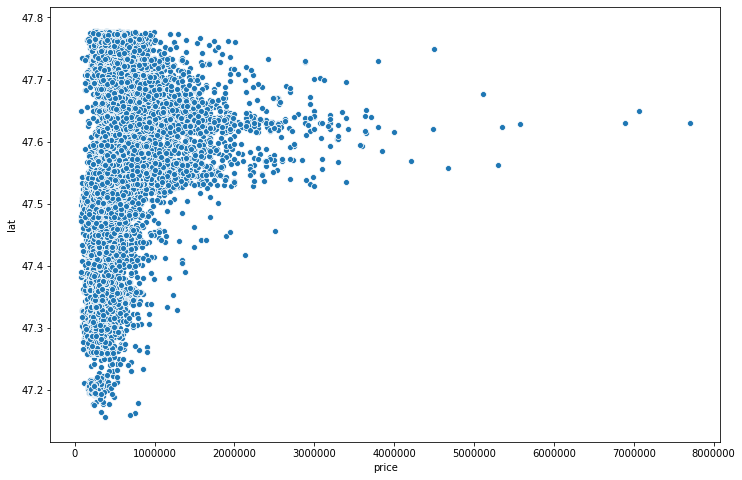

In [29]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='price', y='lat', data=df)

It indicates that the price of the houses will be more in the latitude in 47.7

### longitude vs latitude (map) with price comparision

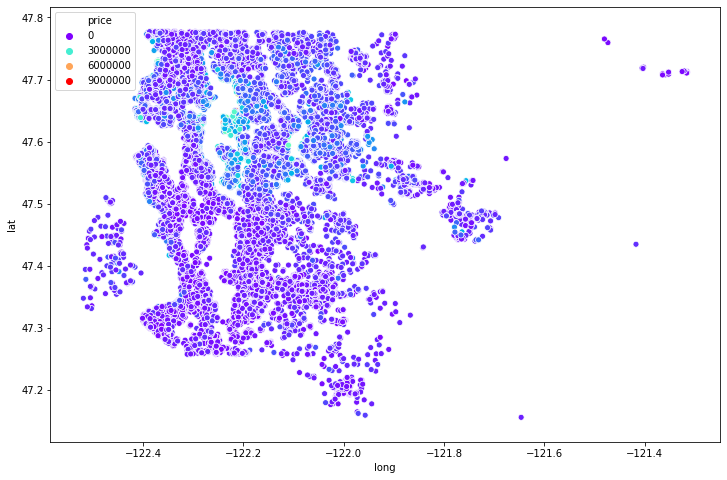

In [18]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=df['long'], y=df['lat'], hue=df['price'], palette='rainbow')

Since we are not getting extreme prices, we can ignore them

In [19]:
df.sort_values(by='price', ascending=False).head(20)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


Ignoring top 1 percent of highest priced houses

In [20]:
len(df)

21597

In [21]:
len(df)*0.01

215.97

In [22]:
non_top_1_perc = df.sort_values(by='price', ascending=False).iloc[216:]

In [23]:
len(non_top_1_perc)

21381

Plotting the graph for new dataframe

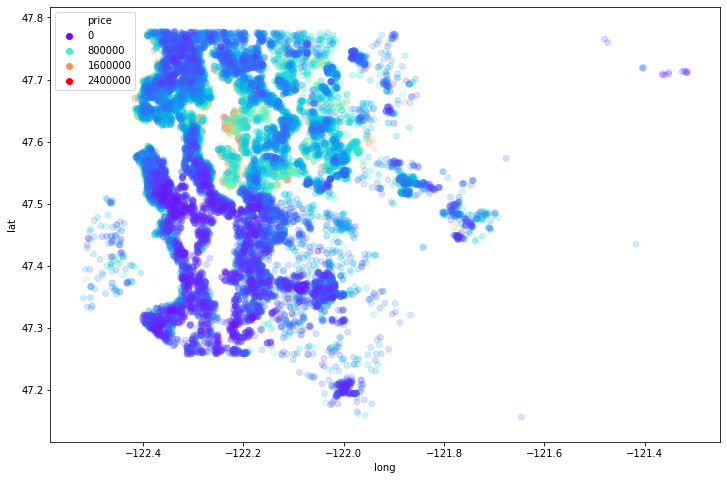

In [26]:
plt.figure(figsize=(12,8))
sns.scatterplot(x=non_top_1_perc['long'], y=non_top_1_perc['lat'],
                hue=non_top_1_perc['price'], palette='rainbow',
                edgecolor=None, alpha=0.2)

It indicates that the price of the houses will be more in the longitude in -122.2 and latitude 47.6

### Other Features

In [27]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### waterfront vs price

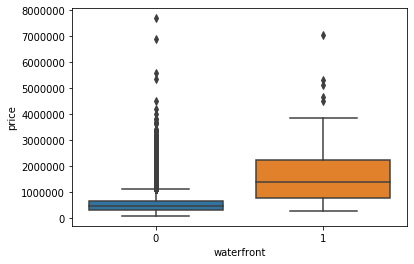

In [28]:
sns.boxplot(x='waterfront', y='price', data=df)

It indicates the the houses having waterfront are often sells at higher price

## Working with Feature Data

Considering original dataframe instead of bottom 99% priced one

In [30]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

Since id column is of no use, we can drop them

In [32]:
df.drop('id', axis=1, inplace=True)

### Feature Engineering from Date

In [33]:
df['date'].head()

0    10/13/2014
1     12/9/2014
2     2/25/2015
3     12/9/2014
4     2/18/2015
Name: date, dtype: object

#### Type of the data column is object so we can convert it into date format

In [34]:
df['date'] = pd.to_datetime(df['date'])

In [37]:
df['date'].head()

0   2014-10-13
1   2014-12-09
2   2015-02-25
3   2014-12-09
4   2015-02-18
Name: date, dtype: datetime64[ns]

#### Creating `month` column from `date` column

In [38]:
df['month'] = df['date'].apply(lambda x: x.month)

#### Creating `year` column from `date` column

In [39]:
df['year'] = df['date'].apply(lambda x: x.year)

#### year vs price

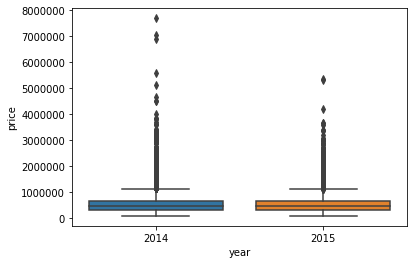

In [40]:
sns.boxplot(x='year', y='price', data=df)

It indicates max price of house was in 2014.

#### month vs price

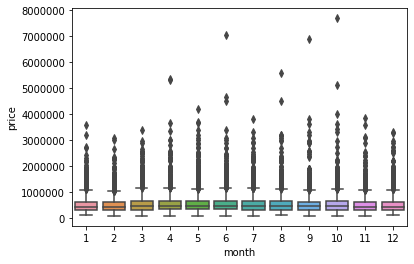

In [41]:
sns.boxplot(x='month', y='price', data=df)

This indicates max price of house was sold in October.

#### Average Price per month

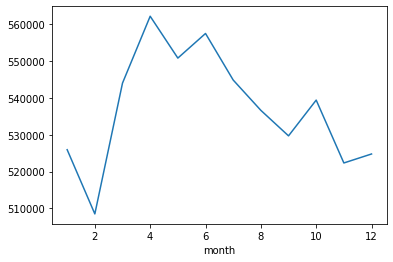

In [44]:
df.groupby('month').mean()['price'].plot()

It indicates price of the house was more in April.

#### Average Price per year

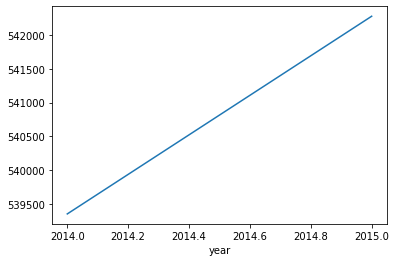

In [45]:
df.groupby('year').mean()['price'].plot()

It indicates prices of houses are steadily increasing from 2014 to 2015

#### Dropping `date` column

In [46]:
df.drop('date', axis=1, inplace=True)

#### Columns

In [47]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'month', 'year'],
      dtype='object')

In [48]:
# https://i.pinimg.com/originals/4a/ab/31/4aab31ce95d5b8474fd2cc063f334178.jpg
# May be worth considering to remove this or feature engineer categories from it
df['zipcode'].value_counts()

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [49]:
df = df.drop('zipcode',axis=1)

In [50]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,month,year
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,10,2014
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,12,2014
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2,2015
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,12,2014
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2,2015


#### yr_renovated

In [51]:
# could make sense due to scaling, higher should correlate to more value
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

#### sqft_basement

In [52]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

## Scaling and Train Test Split

In [54]:
X = df.drop('price', axis=1)
y = df['price']

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

### Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler

In [58]:
scaler = MinMaxScaler()

In [59]:
X_train = scaler.fit_transform(X_train)

In [60]:
X_test = scaler.transform(X_test)

In [61]:
X_train.shape

(15117, 19)

In [62]:
X_test.shape

(6480, 19)

## Creating a Model

In [64]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [65]:
len(df.columns)

20

In [82]:
model = Sequential()

model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=19, activation='relu'))
model.add(Dense(units=1))

model.compile(optimizer='Adam', loss='mse')

## Training the Model

In [83]:
model.fit(x=X_train,y=y_train.values, validation_data=(X_test,y_test.values), batch_size=128, epochs=500)

Train on 15117 samples, validate on 6480 samples
Epoch 1/500
15117/15117 [==============================] - 0s 23us/sample - loss: 430239634446.0218 - val_loss: 418916454713.5211
Epoch 2/500
15117/15117 [==============================] - 0s 8us/sample - loss: 429277824399.0464 - val_loss: 415637948512.0790
Epoch 3/500
15117/15117 [==============================] - 0s 8us/sample - loss: 416623400688.0984 - val_loss: 387026195190.5185
Epoch 4/500
15117/15117 [==============================] - 0s 8us/sample - loss: 355242473167.0422 - val_loss: 286609489434.5482
Epoch 5/500
15117/15117 [==============================] - 0s 8us/sample - loss: 220247051869.3773 - val_loss: 142045687615.8420
Epoch 6/500
15117/15117 [==============================] - 0s 8us/sample - loss: 115089200024.9700 - val_loss: 96457867446.0444
Epoch 7/500
15117/15117 [==============================] - 0s 7us/sample - loss: 98394391007.7227 - val_loss: 94318323868.7605
Epoch 8/500
15117/15117 [=========================

15117/15117 [==============================] - 0s 8us/sample - loss: 40276480318.7765 - val_loss: 39067257949.5506
Epoch 65/500
15117/15117 [==============================] - 0s 8us/sample - loss: 40044673210.6868 - val_loss: 38832158785.7383
Epoch 66/500
15117/15117 [==============================] - 0s 7us/sample - loss: 39842007837.0089 - val_loss: 38613722382.5383
Epoch 67/500
15117/15117 [==============================] - 0s 8us/sample - loss: 39640763021.4037 - val_loss: 38398985400.5728
Epoch 68/500
15117/15117 [==============================] - 0s 8us/sample - loss: 39417026485.2169 - val_loss: 38195782850.6864
Epoch 69/500
15117/15117 [==============================] - 0s 8us/sample - loss: 39218462057.7903 - val_loss: 37980521954.9235
Epoch 70/500
15117/15117 [==============================] - 0s 8us/sample - loss: 39018422399.8899 - val_loss: 37848071028.9383
Epoch 71/500
15117/15117 [==============================] - 0s 8us/sample - loss: 38818324131.5541 - val_loss: 376442

Epoch 128/500
15117/15117 [==============================] - 0s 7us/sample - loss: 33729200571.8214 - val_loss: 32367391579.6543
Epoch 129/500
15117/15117 [==============================] - 0s 7us/sample - loss: 33712779096.0767 - val_loss: 32345806418.1728
Epoch 130/500
15117/15117 [==============================] - 0s 7us/sample - loss: 33644664541.5381 - val_loss: 32276357089.6593
Epoch 131/500
15117/15117 [==============================] - 0s 8us/sample - loss: 33628279533.7276 - val_loss: 32267325096.1383
Epoch 132/500
15117/15117 [==============================] - 0s 8us/sample - loss: 33595409182.9056 - val_loss: 32204883922.4889
Epoch 133/500
15117/15117 [==============================] - 0s 7us/sample - loss: 33539349345.2891 - val_loss: 32184477215.6049
Epoch 134/500
15117/15117 [==============================] - 0s 7us/sample - loss: 33505143314.3909 - val_loss: 32115524929.1062
Epoch 135/500
15117/15117 [==============================] - 0s 8us/sample - loss: 33474966225.27

15117/15117 [==============================] - 0s 8us/sample - loss: 32046891584.8594 - val_loss: 30442867628.5630
Epoch 192/500
15117/15117 [==============================] - 0s 8us/sample - loss: 32050357430.1483 - val_loss: 30432193316.0296
Epoch 193/500
15117/15117 [==============================] - 0s 8us/sample - loss: 32012470844.0161 - val_loss: 30379200653.5901
Epoch 194/500
15117/15117 [==============================] - 0s 8us/sample - loss: 31992945682.7635 - val_loss: 30414858361.3630
Epoch 195/500
15117/15117 [==============================] - 0s 7us/sample - loss: 32035904963.2726 - val_loss: 30347143810.2123
Epoch 196/500
15117/15117 [==============================] - 0s 7us/sample - loss: 31943890583.6322 - val_loss: 30323949836.0099
Epoch 197/500
15117/15117 [==============================] - 0s 7us/sample - loss: 31938869212.9116 - val_loss: 30351105506.9235
Epoch 198/500
15117/15117 [==============================] - 0s 7us/sample - loss: 32021139236.6634 - val_loss:

15117/15117 [==============================] - 0s 7us/sample - loss: 31101664564.1416 - val_loss: 29239074588.4444
Epoch 255/500
15117/15117 [==============================] - 0s 8us/sample - loss: 31070003073.8713 - val_loss: 29204899157.3333
Epoch 256/500
15117/15117 [==============================] - 0s 7us/sample - loss: 31070549993.3585 - val_loss: 29205685746.0938
Epoch 257/500
15117/15117 [==============================] - 0s 8us/sample - loss: 31050458316.2310 - val_loss: 29206791418.3111
Epoch 258/500
15117/15117 [==============================] - 0s 8us/sample - loss: 31028533994.8826 - val_loss: 29226975636.5432
Epoch 259/500
15117/15117 [==============================] - 0s 7us/sample - loss: 31060256965.9313 - val_loss: 29206586547.5160
Epoch 260/500
15117/15117 [==============================] - 0s 8us/sample - loss: 31029649571.9267 - val_loss: 29191512923.6543
Epoch 261/500
15117/15117 [==============================] - 0s 8us/sample - loss: 31009857715.2694 - val_loss:

15117/15117 [==============================] - 0s 8us/sample - loss: 30559828462.2187 - val_loss: 28554483535.0123
Epoch 318/500
15117/15117 [==============================] - 0s 7us/sample - loss: 30516181172.5903 - val_loss: 28462470475.2198
Epoch 319/500
15117/15117 [==============================] - 0s 8us/sample - loss: 30497593742.5722 - val_loss: 28499299153.5407
Epoch 320/500
15117/15117 [==============================] - 0s 8us/sample - loss: 30472751595.3737 - val_loss: 28442149885.4716
Epoch 321/500
15117/15117 [==============================] - 0s 7us/sample - loss: 30457287254.6712 - val_loss: 28393765683.2000
Epoch 322/500
15117/15117 [==============================] - 0s 7us/sample - loss: 30442215043.1752 - val_loss: 28375560743.1901
Epoch 323/500
15117/15117 [==============================] - 0s 7us/sample - loss: 30457577048.2969 - val_loss: 28438162196.8593
Epoch 324/500
15117/15117 [==============================] - 0s 8us/sample - loss: 30443953252.5914 - val_loss:

15117/15117 [==============================] - 0s 8us/sample - loss: 29995583003.9421 - val_loss: 27807261622.6765
Epoch 381/500
15117/15117 [==============================] - 0s 8us/sample - loss: 29993715515.4234 - val_loss: 27795815173.6889
Epoch 382/500
15117/15117 [==============================] - 0s 7us/sample - loss: 30019942910.7468 - val_loss: 27766419865.6000
Epoch 383/500
15117/15117 [==============================] - 0s 7us/sample - loss: 30009247686.9643 - val_loss: 27768021163.9309
Epoch 384/500
15117/15117 [==============================] - 0s 8us/sample - loss: 29968175202.3560 - val_loss: 27778258959.1704
Epoch 385/500
15117/15117 [==============================] - 0s 7us/sample - loss: 30022752383.4835 - val_loss: 27753034764.6420
Epoch 386/500
15117/15117 [==============================] - 0s 8us/sample - loss: 29980003628.1484 - val_loss: 27719847551.6840
Epoch 387/500
15117/15117 [==============================] - 0s 8us/sample - loss: 29946312276.9100 - val_loss:

15117/15117 [==============================] - 0s 7us/sample - loss: 29567041709.9520 - val_loss: 27162059854.3802
Epoch 444/500
15117/15117 [==============================] - 0s 7us/sample - loss: 29522324221.3074 - val_loss: 27213318816.5531
Epoch 445/500
15117/15117 [==============================] - 0s 8us/sample - loss: 29575342013.3455 - val_loss: 27203934961.4617
Epoch 446/500
15117/15117 [==============================] - 0s 7us/sample - loss: 29552473061.0402 - val_loss: 27199684071.9802
Epoch 447/500
15117/15117 [==============================] - 0s 7us/sample - loss: 29497429075.2504 - val_loss: 27153345659.8914
Epoch 448/500
15117/15117 [==============================] - 0s 8us/sample - loss: 29507938385.6924 - val_loss: 27177935419.4173
Epoch 449/500
15117/15117 [==============================] - 0s 7us/sample - loss: 29504051540.9946 - val_loss: 27166188693.1753
Epoch 450/500
15117/15117 [==============================] - 0s 8us/sample - loss: 29517581678.6675 - val_loss:

In [84]:
losses = pd.DataFrame(model.history.history)

In [85]:
losses.head()

,loss,val_loss
0,4.302396e+11,4.189165e+11
1,4.292778e+11,4.156379e+11
2,4.166234e+11,3.870262e+11
3,3.552425e+11,2.866095e+11
4,2.202471e+11,1.420457e+11


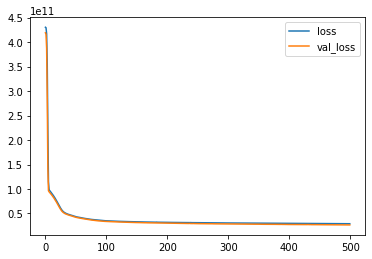

In [86]:
losses.plot()

## Evaluation on Test Data

[Explained Variance Score](https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics)

In [87]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

### Predicting on Brand New Data

In [88]:
X_test

array([[0.1       , 0.08      , 0.04239917, ..., 0.00887725, 0.63636364,
        0.        ],
       [0.3       , 0.36      , 0.17269907, ..., 0.00993734, 0.81818182,
        0.        ],
       [0.2       , 0.24      , 0.12512927, ..., 0.00547073, 0.90909091,
        0.        ],
       ...,
       [0.1       , 0.08      , 0.05584281, ..., 0.00506255, 1.        ,
        0.        ],
       [0.3       , 0.2       , 0.22233713, ..., 0.00774485, 0.09090909,
        1.        ],
       [0.3       , 0.32      , 0.27611169, ..., 0.0196531 , 0.45454545,
        0.        ]])

In [89]:
predictions = model.predict(X_test)

In [92]:
print('Mean Absolute Error: {}'.format(mean_absolute_error(y_true=y_test, y_pred=predictions)))

Mean Absolute Error: 101920.21456283757


In [93]:
print('Mean Squared Error: {}'.format(mean_squared_error(y_true=y_test, y_pred=predictions)))

Mean Squared Error: 26669107868.1037


In [96]:
print('Root Mean Squared Error: {}'.format(np.sqrt(mean_squared_error(y_true=y_test, y_pred=predictions))))

Root Mean Squared Error: 163306.79063683696


In [97]:
print('Explained Variance Score: {}'.format(explained_variance_score(y_true=y_test, y_pred=predictions)))

Explained Variance Score: 0.7991125059935735


#### Averege Price

In [98]:
df['price'].mean()

540296.5735055795

#### Price Median

In [99]:
df['price'].median()

450000.0

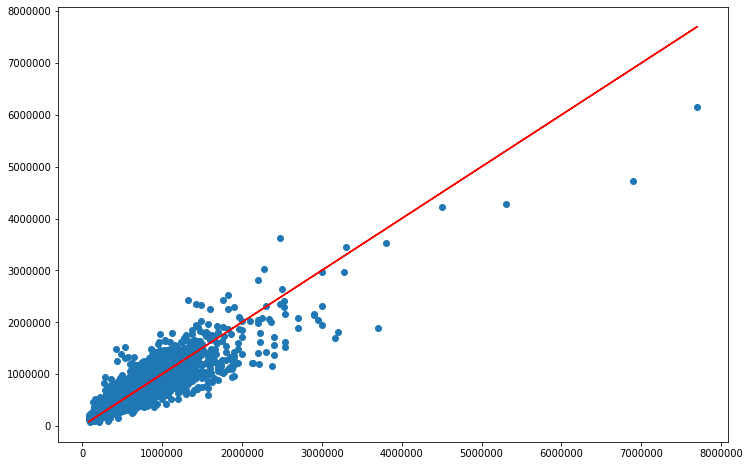

In [107]:
plt.figure(figsize=(12,8))

# Our Predictions
plt.scatter(x=y_test, y=predictions)

# Perfect Predictions
plt.plot(y_test, y_test,'r')

Above diagram indicates our model is behaving good for price in range 0 to 2000000 and for higher prices we are getting error

### Errors

In [112]:
y_test.shape

(6480,)

In [113]:
predictions.shape

(6480, 1)

In [114]:
errors = y_test.values.reshape(6480,1) - predictions

### Distribution of Errors

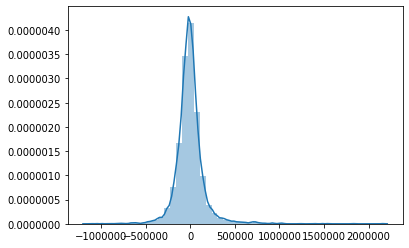

In [115]:
sns.distplot(errors)

___

## Predicting on a brand new house

In [116]:
single_house = df.drop('price', axis=1).iloc[0]

In [120]:
type(single_house)

pandas.core.series.Series

### Scaling features (since we have trained our model on scaled one)

In [121]:
single_house.shape

(19,)

In [122]:
single_house = scaler.transform(single_house.values.reshape(-1,19))

In [123]:
single_house.shape

(1, 19)

In [124]:
type(single_house)

numpy.ndarray

In [125]:
single_house

array([[0.2       , 0.08      , 0.08376422, 0.00310751, 0.        ,
        0.        , 0.        , 0.5       , 0.4       , 0.10785619,
        0.        , 0.47826087, 0.        , 0.57149751, 0.21760797,
        0.16193426, 0.00582059, 0.81818182, 0.        ]])

### Predictions

In [126]:
model.predict(single_house)

array([[288720.72]], dtype=float32)

In [127]:
df['price'].iloc[0]

221900.0

For single house `221900.0` is the actual value and `288720.72` is our predicted value

___

## Thank You!